# Computer Vision Assignment-A

Computer Vision(CG7GV1)

Name: Himanshu Gupta
    
Student Id: 19300733
    
Email Id : guptah@tcd.ie

# 1.Histogram

1.a) Read a RGB colour image (e.g. png):

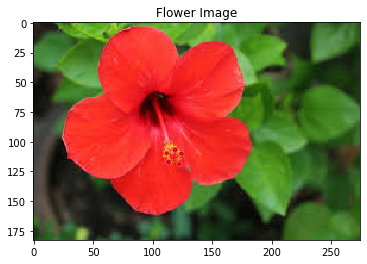

In [26]:
#Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D 

img_bgr=cv2.imread('Flower.png',1)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #cv2 function to convert Image to RGB format
rcParams['figure.figsize'] = 6,4
plt.figure()
plt.title('Flower Image')
plt.imshow(img_rgb)

1.b) Convert the RGB image into Lab colour system and display each component (L,a,b) as an grey level image:

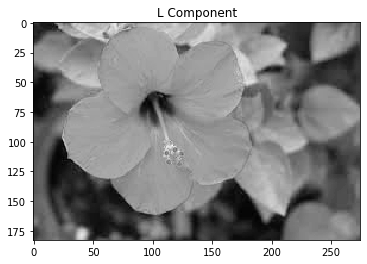

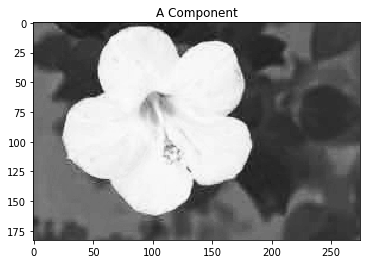

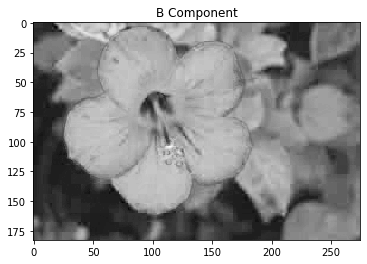

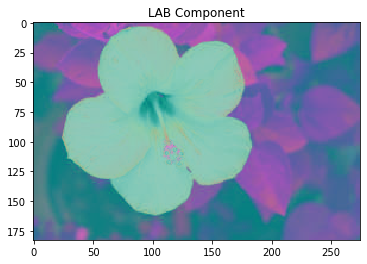

In [9]:
#Convert the RGB image into Lab colour system 
import cv2 
import matplotlib.pyplot as plt
img = cv2.imread('Flower.png') 

#Convert to LAB
lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l_channel,a_channel,b_channel = cv2.split(lab_image)

rcParams['figure.figsize'] = 6,4
plt.figure()
plt.title('L Component')
plt.imshow(l_channel,'gray') #Gray L Component
plt.figure()

plt.title('A Component')
plt.imshow(a_channel,'gray') #Gray A Component
plt.figure()
plt.title('B Component')
plt.imshow(b_channel,'gray') #Gray B Component
plt.figure()
plt.title('LAB Component')
plt.imshow(lab_image,'gray')  #Gray LAB Component

1.c) Compute the spatial derivatives of the luminance component L  in the horizontal and vertical direction using
convolution by the derivatives of Gaussian filter. Display each these derivatives  as grey level images

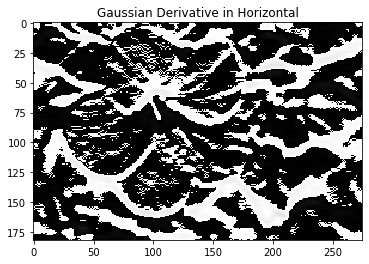

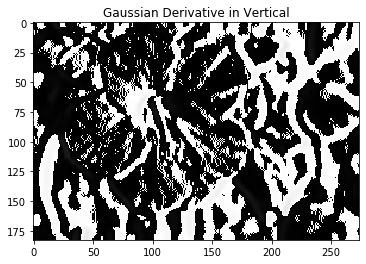

In [11]:
import numpy as np
#Here the image is convolved with a Gaussian filter instead of the box filter
gaussImage = cv2.GaussianBlur(l_channel,(5,5),5,5)
    
#Derivative along x axis
img_x = np.diff(gaussImage,axis=0)

rcParams['figure.figsize'] = 6,4
plt.figure()
plt.title('Gaussian Derivative in Horizontal')
plt.imshow(img_x,'gray')
   
#Derivative along y axis
img_y = np.diff(gaussImage,axis=1)
plt.figure()
plt.title('Gaussian Derivative in Vertical')
plt.imshow(img_y,'gray')

1.d) Compute a 2D histogram with the chrominance component (a,b)  and display the histogram as a grey image (heat map) and/or as a 3D surface (bar plot) 

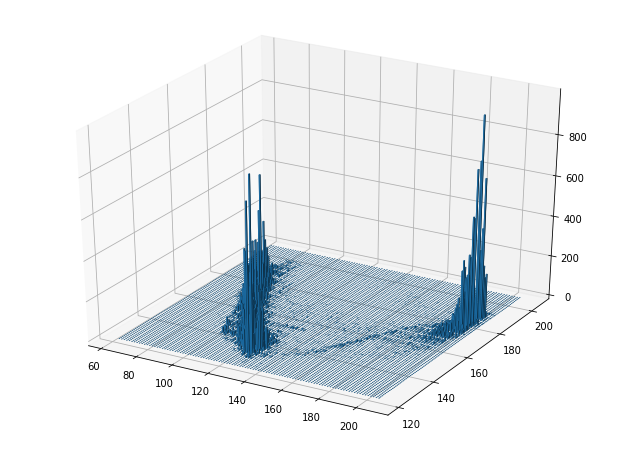

<Figure size 792x576 with 0 Axes>

In [13]:
import matplotlib.colors as colors
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d') #3D projection

hist, xbins, ybins = np.histogram2d(a_channel.ravel(),b_channel.ravel(),bins=100)
rcParams['figure.figsize'] = 11,8
plt.figure()

# Construct arrays for the anchor positions with 16 bars.
xpos, ypos = np.meshgrid(xbins[:-1] + 0.25, ybins[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
x = y = 0.5 * np.ones_like(zpos)
z = hist.ravel()

ax.bar3d(xpos, ypos, zpos, x, y, z, zsort='average')

1.e)  Using a part of the image to compute a 2D histogram model with the chrominance component (a,b), compute a back projection map with this model histogram in the target image.

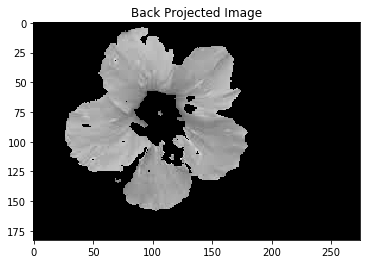

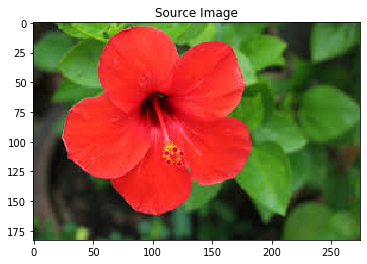

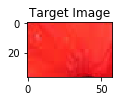

In [15]:
#Back Projection: Back Projection is a way of recording how well the pixels of a given image fit the distribution of pixels.

target = "FlowerPart.png"
source_img = "Flower.png"

#Read Source Image
sourceRead = cv2.imread(source_img)
source_img = cv2.cvtColor(sourceRead, cv2.COLOR_BGR2RGB)

#Read Target Image
targeta = cv2.imread(target)
target_image = cv2.cvtColor(targeta, cv2.COLOR_BGR2RGB)
target = cv2.cvtColor(targeta, cv2.COLOR_BGR2LAB)
source_img1 = cv2.cvtColor(sourceRead, cv2.COLOR_BGR2LAB)
hist_target = cv2.calcHist([target], [1, 2], None, [256, 256], [0, 256, 0, 256])
back_proj = cv2.calcBackProject([source_img1],[1,2],hist_target,[0,256,0,256],1)

#Removing Noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
back_proj = cv2.filter2D(back_proj,-1,kernel)

#pixel value is greater than a threshold value, it is assigned one value (may be white), 
#else it is assigned another value (may be black)
_, back_proj = cv2.threshold(back_proj, 127, 255, cv2.THRESH_BINARY)
back_proj = cv2.merge((back_proj, back_proj, back_proj))
result = cv2.bitwise_and(source_img,back_proj)

#Display Back Projected Image in Gray
final = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
rcParams['figure.figsize'] = 6,4
plt.figure()
plt.title('Back Projected Image')
plt.imshow(final,cmap='gray')

rcParams['figure.figsize'] = 6,4
plt.figure()
plt.title('Source Image')
plt.imshow(source_img)

rcParams['figure.figsize'] = 2,1
plt.figure()
plt.title('Target Image')
plt.imshow(target_image)


1.f) Perform histogram equalization using 1D histogram using the luminance L computed in 1.a. Display the resulting image with enhanced contrast.

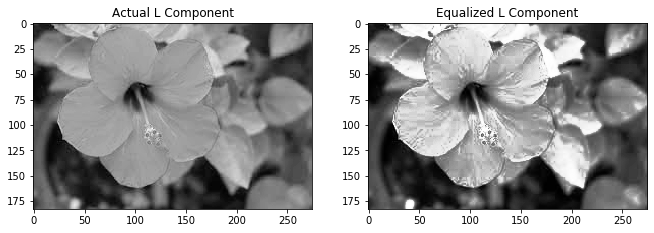

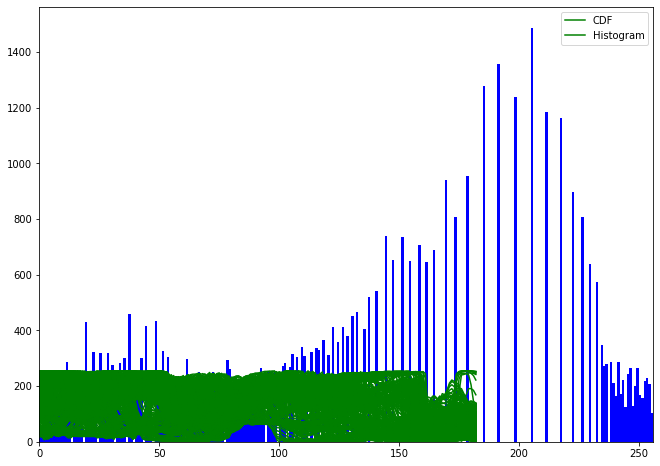

In [16]:
#Importing Required Libraries
import cv2
import numpy as np
img = cv2.imread('Flower.png')

#COLOR_BGR2LAB is a color space conversion method used to convert in LAB componets
lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l_channel,a_channel,b_channel = cv2.split(lab_image)

#Equalizing the histogram using the luminance L.
equalized_channels = []
equalized_channels.append(cv2.equalizeHist(l_channel))

equalized_image = cv2.merge(equalized_channels)

#rcparams is being used to Plot the images next to each other.
rcParams['figure.figsize'] = 11 ,8
fig,ax = plt.subplots(1,2)
ax[0].imshow(l_channel,cmap="gray")
ax[0].title.set_text('Actual L Component')
ax[1].imshow(equalized_image,cmap="gray")
ax[1].title.set_text('Equalized L Component')

#Plot histogram
plt.figure()
plt.plot(equalized_image, color = 'g')
plt.hist(equalized_image.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('CDF','Histogram'), loc = 'upper right')
plt.show()

1.g) Evaluate the performance of these techniques with histograms (i.e. illustrate when it works, and when it does not work.

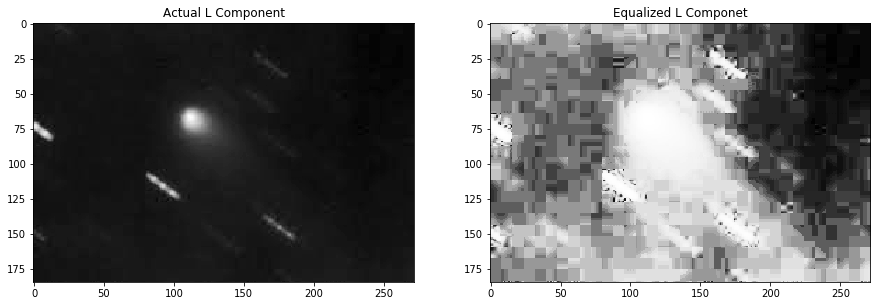

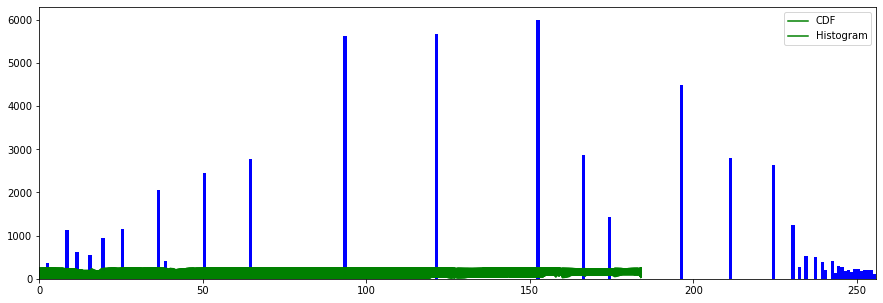

In [18]:
#Equalization Histogram fails: It fails when input image has a large area low-intensity background.
from matplotlib import rcParams
#Read image
img_bgr=cv2.imread('ImageToEqualize.jpg',1)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

#Split RGB image into LAB components
l_component,a_component,b_component = cv2.split(img_rgb)

#Calcuate the histogram
eq_channels = []
eq_channels.append(cv2.equalizeHist(l_component))
eq_image = cv2.merge(eq_channels)

rcParams['figure.figsize'] = (15 ,5)
fig,ax = plt.subplots(1,2)
ax[0].imshow(l_component,cmap="gray")
ax[0].title.set_text('Actual L Component')
ax[1].imshow(eq_image,cmap="gray")
ax[1].title.set_text('Equalized L Componet')

plt.figure()
plt.plot(eq_image, color = 'g')
plt.hist(eq_image.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('CDF','Histogram'), loc = 'upper right')
plt.show()  

As shown above, equilzation fails when input image has a large area low-intensity background. Output here has severe washed-out appearance.
The histogram works when the colors are distributed in the image. 

# 2.Principal Component Analysis (PCA)

2.a) Compute the mean image and principal components for a set of images (e.g. use the training images of ‘5’ in the mnist dataset). Display the mean image and the first 2 principal components (associated with the highest eigenvalues

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


<Figure size 1080x360 with 0 Axes>

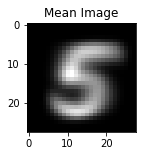

<Figure size 1080x360 with 0 Axes>

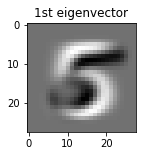

<Figure size 1080x360 with 0 Axes>

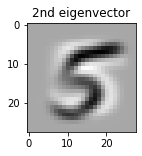

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

#Fetch dataset from openml by name or dataset id.
images,labels = fetch_openml('mnist_784', version=1, return_X_y=True)
n_train= 60000 #The size of the training set
train_images = images[:n_train]
train_labels = labels[:n_train]
test_images = images[n_train:]
test_labels = labels[n_train:]

#The below code will filter out the image set 5 as training set image
conv_train_images = train_images.astype(np.float32)/255
conv_train_labels = train_labels.astype(np.float32)
conv_test_images = test_images.astype(np.float32)/255
conv_test_labels = test_labels.astype(np.float32)
labels_n = np.where(conv_train_labels == 5)
image_matrix = conv_train_images[list(labels_n)]

X=image_matrix
num_data,dim = X.shape

#calculate mean
mean_X = X.mean(axis=0)
X = X-mean_X

#for higher dimension images
if dim>num_data:
    covM = np.dot(X,X.T) #covariance matrix
    eg,EV = np.linalg.eigh(covM) #eigenvalues and eigne vectors
    tmp = np.dot(X.T,EV).T  #vector multiplication to match the dimension
    eigenVectors = tmp[::-1] #reverce to get the highest eigen vectors
    eigenValues = np.sqrt(eg)[::-1] #reverse the vector to get highest eigen values
    for i in range(eigenVectors.shape[1]):
        eigenVectors[:,i] /= eigenValues
else:
    U,eigenValues,eigenVectors = np.linalg.svd(X)
    eigenVectors = eigenVectors[:num_data] ##Generate Eigenvalues,eigenvectors and mean image: eigenVectors,eigenValues and mean_X

#Test image for pca
tlab = np.where(conv_test_labels == 5)
tst_img = conv_test_images[list(tlab)]
test_img = tst_img[10]

#Plot mean and first two eigenvectors
plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(mean_X.reshape(28,28))
plt.title("Mean Image")
plt.show()

plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(eigenVectors[0].reshape(28,28))
plt.title("1st eigenvector")
plt.show()

plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(eigenVectors[1].reshape(28,28))
plt.title("2nd eigenvector")
plt.show()

2.b) Compute and display the reconstructions of a test image using the mean image and with p principal components associated with the p highest eigenvalues (e.g. Fig 10.12) with p=10 and p=50

<Figure size 1080x360 with 0 Axes>

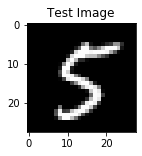

<Figure size 1080x360 with 0 Axes>

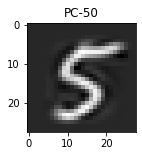

<Figure size 1080x360 with 0 Axes>

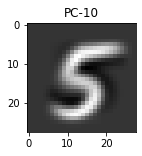

In [23]:
#Displaying various PC components
pc_10 = np.dot(np.dot(test_img - mean_X,eigenVectors[:10].T),eigenVectors[:10]) + mean_X
pc_50 = np.dot(np.dot(test_img - mean_X,eigenVectors[:50].T),eigenVectors[:50]) + mean_X
pc_all_components = np.dot(np.dot(test_img - mean_X,eigenVectors[:784].T),eigenVectors[:784]) + mean_X

img_dict = {0:('Test Image',test_img),1:('PC-50',pc_50),2:('PC-10',pc_10)}
plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(test_img.reshape(28,28))
plt.title("Test Image")
plt.show()

plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(pc_50.reshape(28,28))
plt.title("PC-50")
plt.show()

plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(pc_10.reshape(28,28))
plt.title("PC-10")
plt.show()

2.c) Compute and display a DFFS (distance-from feature-space) and SSD (sum-of-square-differences) heat maps for detection using your PCA 
representation of a MNIST number

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  app.launch_new_instance()


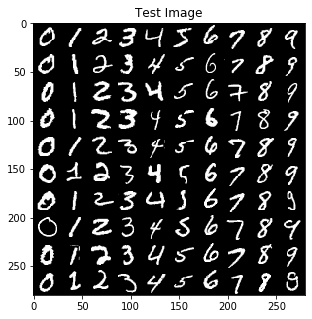

In [24]:
#Test Image for ssd and dffs

test_img_scale =  []

for i in range(10):
    for j in range(10):
        label_i = np.where(conv_train_labels == j)
        test_img_scale.append(conv_train_images[label_i[0][i]])

temp = np.hstack( (np.asarray([ i.reshape(28,28) for i in test_img_scale ])))

test_img_scale =  []
for i in range(0,temp.shape[1],280):
    test_img_scale.append(np.array(temp[0:28,0+i:280+i]))

test_image = np.vstack(x for x in test_img_scale)

plt.imshow(test_image)
plt.title("Test Image")

target_img = test_image

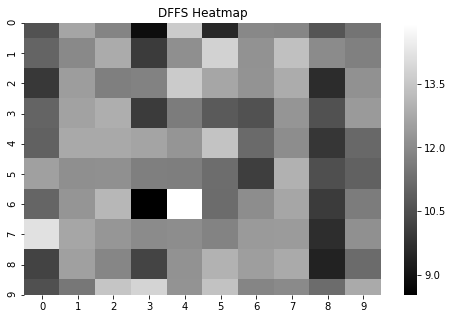

In [25]:
#DFFS Heat Map Representation
imgmean = mean_X
pca_reconstruct = pc_all_components

df_vector = []
for i in range(0,target_img.shape[0],28):
    for j in range(0,target_img.shape[1],28):
        
        #DFFS calculation
        df_vector.append(np.sqrt(np.sum(np.square(np.subtract(np.subtract(target_img[0+i:28+i,j:28+j],imgmean.reshape(28,28)),pca_reconstruct.reshape(28,28)))))) 

rcParams['figure.figsize'] = (8 ,5)

#Plot DFFS heat map
plt.figure()
plt.title("DFFS Heatmap")
sns.heatmap(np.array(df_vector).reshape(10,10),cmap='gray')

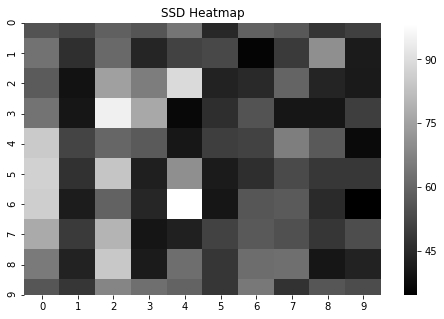

In [40]:
#SSD Heat Map Representation
sd_vector = []
for i in range(0,target_img.shape[0],28):
    for j in range(0,target_img.shape[1],28):
        
        #SSD calculation
        sd_vector.append(np.sum(np.square(np.subtract(target_img[i:28+i,j:28+j],imgmean.reshape(28,28)))))

rcParams['figure.figsize'] = (8 ,5)

#Plot SSD Heat map 
plt.figure()
plt.title("SSD Heatmap")
sns.heatmap(np.array(sd_vector).reshape(10,10),cmap='gray')

2.d) Evaluate the performance of SSD and DFFS (i.e. illustrate when it works, and when it does not work).

The heat map of SSD is better as compared to DFFS for given target.SSD is formed for object detection in real-time. Faster R-CNN utilizes boxes to classify objects which use a region proposal network to create boundary boxes.The SSD and DFFS is plotted by sliding  pixel by pixel, the pixels are padded with zeros on the last image.SSD enhances the process by eliminating the need of the RPN. “To recover the drop in accuracy, SSD applies a few improvements including multi-scale features and default boxes. Basically DFFS is the projection of SSD in Eigen space so as to achieve good amount of precision during heat map generation.
Also the calculation of SSD and DFFS varies based on the target image chosen.